In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
raw_train = pd.read_csv("data/train.csv", parse_dates=['host_since', 'first_review', 'last_review'])
raw_test = pd.read_csv("data/test.csv", parse_dates=['host_since', 'first_review', 'last_review'])


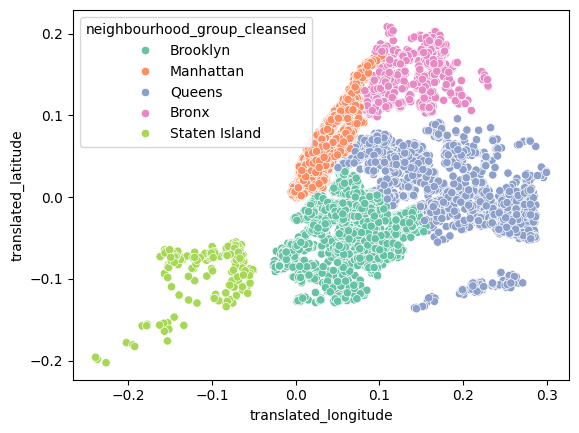

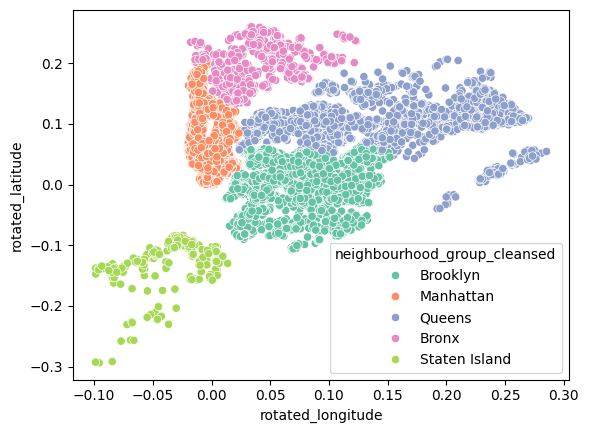

In [58]:
center_longitude = -74.013
center_latitude = 40.703

# Translate coordinates to center the rotation
raw_train['translated_longitude'] = raw_train['longitude'] - center_longitude
raw_train['translated_latitude'] = raw_train['latitude'] - center_latitude

sns.scatterplot(data=raw_train, x='translated_longitude', y='translated_latitude', hue='neighbourhood_group_cleansed', palette='Set2')
plt.show()

theta = np.radians(32)

# Create the rotation matrix
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Rotate the coordinates
coords = raw_train[['translated_longitude', 'translated_latitude']].values
rotated_coords = coords @ rotation_matrix.T

# Add rotated coordinates to the dataframe
raw_train['rotated_longitude'] = rotated_coords[:, 0]
raw_train['rotated_latitude'] = rotated_coords[:, 1]

sns.scatterplot(data=raw_train, x='rotated_longitude', y='rotated_latitude', hue='neighbourhood_group_cleansed', palette='Set2')
plt.show()


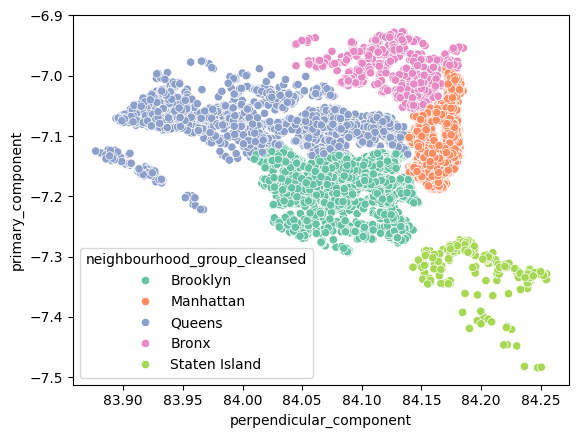

In [63]:
# Define the primary axis vector (e.g., Manhattan's alignment)
primary_axis = np.array([0.1, .15])  # Example: roughly northeast direction
primary_axis = primary_axis / np.linalg.norm(primary_axis)  # Normalize

# Define the perpendicular axis
perpendicular_axis = np.array([-primary_axis[1], primary_axis[0]])  # Orthogonal vector

# Project onto the primary axis
raw_train['primary_component'] = (
    raw_train['longitude'] * primary_axis[0] + raw_train['latitude'] * primary_axis[1]
)

# Project onto the perpendicular axis
raw_train['perpendicular_component'] = (
    raw_train['longitude'] * perpendicular_axis[0] + raw_train['latitude'] * perpendicular_axis[1]
)

# Plot the new components
sns.scatterplot(data=raw_train, x='perpendicular_component', y='primary_component', hue='neighbourhood_group_cleansed', palette='Set2')
plt.show()


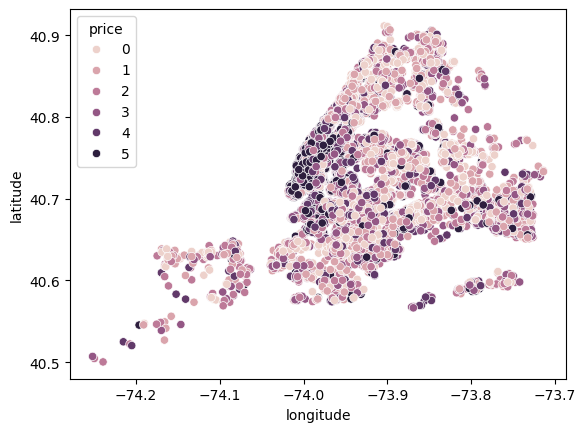

In [20]:
sns.scatterplot(data=raw_train, x='longitude', y='latitude', hue='price')
plt.show()

In [30]:
raw_test["host_response_time"].value_counts()

host_response_time
within an hour        3611
within a few hours    1248
within a day           599
a few days or more     318
Name: count, dtype: int64

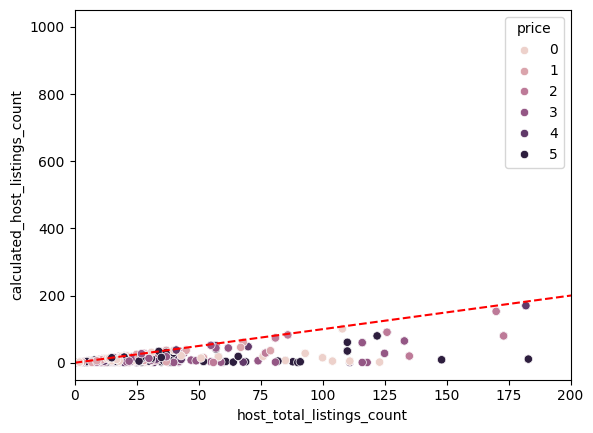

False    9804
True     5892
Name: count, dtype: int64

In [69]:
sns.scatterplot(data=raw_train, x='host_total_listings_count', y='calculated_host_listings_count', hue='price')
plt.plot([0, 1000], [0, 1000], color='red', linestyle='--', label='y=x')
plt.xlim(0, 200)  
plt.show()

(raw_train["host_listings_count"] == raw_train["host_total_listings_count"]).value_counts()


In [4]:
raw_train["room_type"].value_counts()

room_type
Entire home/apt    8592
Private room       6737
Hotel room          200
Shared room         167
Name: count, dtype: int64

In [5]:
raw_train["bathrooms"].value_counts()

bathrooms
1.0     12364
2.0      1802
1.5       694
0.0       353
3.0       176
2.5       162
4.0        49
0.5        39
3.5        34
5.0         8
4.5         6
6.0         2
10.5        1
7.0         1
5.5         1
11.5        1
Name: count, dtype: int64

In [6]:
raw_train["bathrooms_text"].value_counts()


bathrooms_text
1 bath               8050
1 shared bath        2910
1 private bath       1404
2 baths              1261
2 shared baths        541
1.5 baths             444
1.5 shared baths      250
0 shared baths        243
2.5 baths             142
3 baths               124
0 baths               103
3 shared baths         52
4 baths                35
3.5 baths              32
Half-bath              22
2.5 shared baths       20
4 shared baths         13
Private half-bath      12
4.5 baths               6
Shared half-bath        5
5 baths                 4
3.5 shared baths        3
5 shared baths          3
10.5 baths              1
7 baths                 1
5.5 baths               1
6 shared baths          1
11.5 baths              1
6 baths                 1
4.5 shared baths        1
Name: count, dtype: int64

In [33]:
amenities = {}

for list in raw_train['amenities'].apply(lambda x: x.replace('[', '').replace(']', '').replace('"', '').split(', ')):
    for item in list:  
        if item in amenities:
            amenities[item] = amenities[item] + 1
        else: 
            amenities[item] = 1


amenities_df = pd.DataFrame({"Amenity" : [x[0] for x in amenities.items()],
                             "Count" : [x[1] for x in amenities.items()]}).sort_values(by="Count", ascending=False)

amenities_df[amenities_df["Count"] > 100]


,Amenity,Count
3,Smoke alarm,14819
37,Wifi,14363
28,Carbon monoxide alarm,13588
18,Kitchen,13465
20,Hot water,12396
...,...,...
431,Clothing storage: walk-in closet and closet,103
92,Exercise equipment: yoga mat,103
179,Private hot tub,101
298,EV charger,101


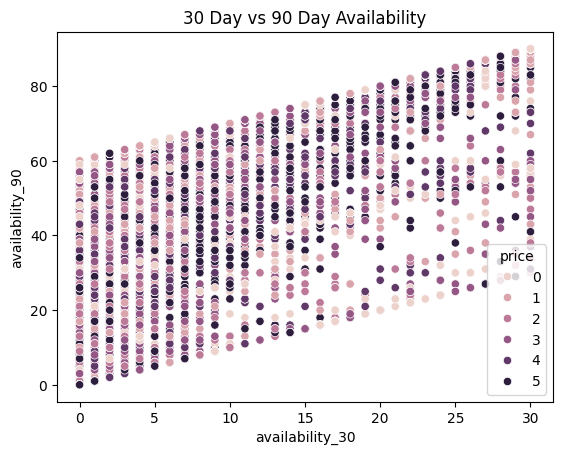

In [36]:
sns.scatterplot(data=raw_train, x='availability_30', y='availability_90', hue='price')
plt.title("30 Day vs 90 Day Availability")
plt.show()


[]

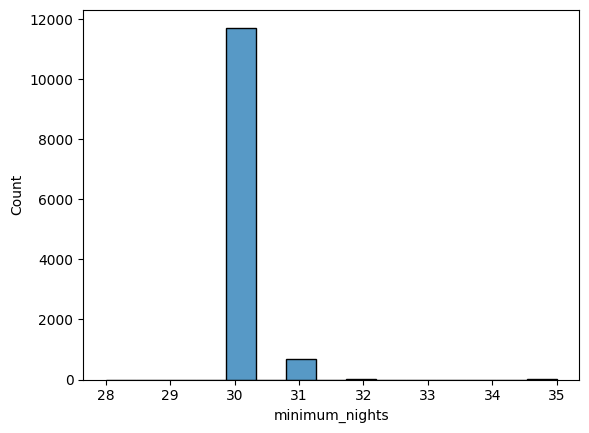

In [44]:
sns.histplot(data=raw_train[(raw_train["minimum_nights"] <= 35) & (raw_train["minimum_nights"] > 25)], x='minimum_nights')
plt.plot()

In [45]:
raw_train

,name,description,property_type,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,reviews
0,Bed-Stuy 2 Bed/2 Bath - Renovated,"Welcome to Bed-Stuy, Brooklyn! Our newly renov...",Entire rental unit,4,Bedford-Stuyvesant,Brooklyn,40.684560,-73.939870,2015-05-23,within a day,...,2024-08-10,5.00,5.00,4.97,5.00,5.00,4.71,4.94,0.52,"Barry's place was perfect. It was cute, modern..."
1,Victorian Flatbush Oasis,"Lovely nonsmoking annex in Brooklyn's ""secret ...",Private room in rental unit,3,Flatbush,Brooklyn,40.638991,-73.965739,2023-09-14,within an hour,...,2024-09-02,4.83,4.87,4.93,4.80,4.90,4.90,4.63,3.81,I booked this place last minute to attend a fu...
2,Bay Ridge Metroscape: Inviting NYC Studio Living,This studio presents unparalleled convenience ...,Entire rental unit,3,Fort Hamilton,Brooklyn,40.618810,-74.032380,2022-07-31,within an hour,...,2024-08-17,4.60,4.80,4.20,4.80,4.80,4.80,4.20,2.14,Great spot! Little far out but overall a great...
3,"New HDTV room, 20 minutes to Manhattan #724",- Furnished room in a newly renovated apartmen...,Private room in rental unit,0,Crown Heights,Brooklyn,40.673970,-73.953990,2012-08-11,within an hour,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Just What You Were Looking For! Pets Allowed,This modern property in Manhattan is just step...,Room in hotel,2,Midtown,Manhattan,40.747180,-73.985390,2014-12-23,within an hour,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15691,Studio Bunk Sky | Placemakr Wall Street,Don’t be deceived by this studio bunk. This sp...,Room in aparthotel,5,Financial District,Manhattan,40.704777,-74.006425,2021-08-27,within an hour,...,2024-08-14,4.94,4.94,4.91,4.97,4.81,5.00,4.72,1.60,Thank you\n---------------------------------\n...
15692,Riverdale Room,Private room in Riverdale. Here you can enjoy ...,Private room in condo,0,Kingsbridge,Bronx,40.881490,-73.910130,2018-07-22,within an hour,...,2023-11-18,4.33,4.33,4.17,4.17,4.33,4.00,4.33,0.35,Reserved this Airbnb and the host never got ba...
15693,One Bedroom Deluxe Suite - Monthly Stay,Stay in an upscale place that’s near everythin...,Room in hotel,5,Midtown,Manhattan,40.765440,-73.976508,2018-03-06,within an hour,...,2023-08-21,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.08,amazing experience. incredible location. staff...
15694,"Blueground | West Village, w/d, nr restaurants",Show up and start living from day one in Downt...,Entire rental unit,5,West Village,Manhattan,40.735635,-74.005740,2016-12-16,within an hour,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
print(raw_train.columns)

Index(['name', 'description', 'property_type', 'price',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'instant_bookable',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'rev

In [85]:
hoods = raw_train["property_type"].value_counts() 
[hoods >= 50].index
hoods

property_type
Entire rental unit                    6516
Private room in rental unit           3943
Private room in home                  1295
Entire home                            716
Private room in townhouse              480
Entire condo                           474
Room in hotel                          432
Private room in condo                  236
Entire townhouse                       216
Entire guest suite                     195
Entire loft                            172
Entire serviced apartment              144
Room in boutique hotel                 124
Shared room in rental unit             112
Private room in serviced apartment      99
Private room in guest suite             87
Private room in loft                    55
Entire place                            46
Private room in bed and breakfast       40
Room in aparthotel                      39
Private room in casa particular         31
Shared room in home                     31
Entire guesthouse                       